# Likelihood ratio analysis

## Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats

# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.ml import ParameterizedRatioEstimator, DoubleParameterizedRatioEstimator


14:44 madminer             INFO    
14:44 madminer             INFO    ------------------------------------------------------------------------
14:44 madminer             INFO    |                                                                      |
14:44 madminer             INFO    |  MadMiner v0.6.2                                                     |
14:44 madminer             INFO    |                                                                      |
14:44 madminer             INFO    |         Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer  |
14:44 madminer             INFO    |                                                                      |
14:44 madminer             INFO    ------------------------------------------------------------------------
14:44 madminer             INFO    


## Make (unweighted) training and test samples

In [2]:
sampler = SampleAugmenter('data/delphes_data_shuffled.h5')

14:44 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
14:44 madminer.analysis    INFO    Found 1 parameters
14:44 madminer.analysis    INFO    Did not find nuisance parameters
14:44 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
14:44 madminer.analysis    INFO    Found 35 observables
14:44 madminer.analysis    INFO    Found 3635115 events
14:44 madminer.analysis    INFO      856510 signal events sampled from benchmark no-higgs
14:44 madminer.analysis    INFO      821845 signal events sampled from benchmark 0.8_k
14:44 madminer.analysis    INFO      922750 signal events sampled from benchmark sm
14:44 madminer.analysis    INFO      112840 signal events sampled from benchmark 1.2_k
14:44 madminer.analysis    INFO      807988 signal events sampled from benchmark 1.5_k
14:44 madminer.analysis    INFO      113182 signal events sampled from benchmark 1.35_k
14:44 madminer.analysis    INFO    Found morphing setup with 5 components
14:44 madmi

In [3]:
# def draw_truncated_gaussian(mean=1., std=1., n=1000):
#     a = - mean / std
#     b = 100.
#     return mean + std * scipy.stats.truncnorm(a=a, b=b).rvs(size=n)


In [4]:
proposal_theta = np.random.normal(loc=1., scale=0.5, size=2000)
# proposal_theta_denom = np.random.normal(loc=1., scale=0.5, size=2000)

proposal_mu = proposal_theta**4.
# proposal_mu_denom = proposal_theta_denom**4.

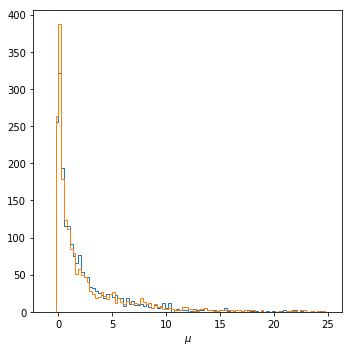

In [5]:
fig = plt.figure(figsize=(5,5))

plt.hist(proposal_mu, range=(-1.,25.), bins=100, histtype="step")
# plt.hist(proposal_mu_denom, range=(-1.,25.), bins=100, histtype="step")
plt.xlabel(r"$\mu$")

plt.tight_layout()
plt.show()

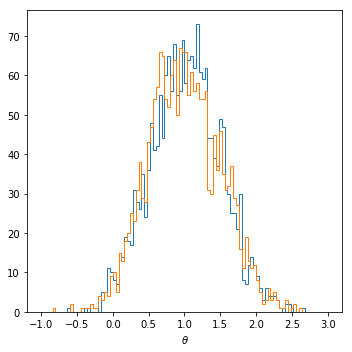

In [6]:
fig = plt.figure(figsize=(5,5))

plt.hist(proposal_theta, range=(-1.,3.), bins=100, histtype="step")
# plt.hist(proposal_theta_denom, range=(-1.,3.), bins=100, histtype="step")
plt.xlabel(r"$\theta$")

plt.tight_layout()
plt.show()

In [7]:
x, theta0, theta1, y, r_xz, t_xz, n_effective = sampler.sample_train_ratio(
    theta0=sampling.morphing_points(proposal_theta.reshape((-1,1))),
    theta1=sampling.benchmark('sm'),
    n_samples=10000000,
    folder='./data/samples',
    filename='train_ratio',
    sample_only_from_closest_benchmark=True,
    return_individual_n_effective=True,
)

14:44 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 2000 morphing points, starting with [array([0.49026155]), array([1.30942893]), array([0.68552843])], denominator hypothesis: sm
14:44 madminer.sampling    INFO    Starting sampling serially
14:46 madminer.sampling    INFO    Sampling from parameter point 100 / 2000
14:48 madminer.sampling    INFO    Sampling from parameter point 200 / 2000
14:50 madminer.sampling    INFO    Sampling from parameter point 300 / 2000
14:52 madminer.sampling    INFO    Sampling from parameter point 400 / 2000
14:54 madminer.sampling    INFO    Sampling from parameter point 500 / 2000
14:56 madminer.sampling    INFO    Sampling from parameter point 600 / 2000
14:57 madminer.sampling    INFO    Sampling from parameter point 700 / 2000
15:00 madminer.sampling    INFO    Sampling from parameter point 800 / 2000
15:01 madminer.sampling    INFO    Sampling from parameter point 900 / 2000
15:03 madminer.sa

In [8]:
# _ = sampler.sample_train_more_ratios(
#     theta0=sampling.morphing_points(proposal_theta.reshape((-1,1))),
#     theta1=sampling.morphing_points(proposal_theta_denom.reshape((-1,1))),
#     n_samples=10000000,
#     folder='./data/samples',
#     filename='train_double_ratio',
#     sample_only_from_closest_benchmark=True,
# )

16:18 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 2000 morphing points, starting with [array([0.49026155]), array([1.30942893]), array([0.68552843])], denominator hypothesis: 2000 morphing points, starting with [array([0.89202925]), array([1.44113285]), array([1.02678157])]
16:18 madminer.sampling    INFO    Starting sampling serially
16:20 madminer.sampling    INFO    Sampling from parameter point 100 / 2000
16:22 madminer.sampling    INFO    Sampling from parameter point 200 / 2000
16:23 madminer.sampling    INFO    Sampling from parameter point 300 / 2000
16:26 madminer.sampling    INFO    Sampling from parameter point 400 / 2000
16:28 madminer.sampling    INFO    Sampling from parameter point 500 / 2000
16:30 madminer.sampling    INFO    Sampling from parameter point 600 / 2000
16:31 madminer.sampling    INFO    Sampling from parameter point 700 / 2000
16:34 madminer.sampling    INFO    Sampling from parameter point 800 / 2

In [9]:
_ = sampler.sample_train_ratio(
    theta0=sampling.morphing_points(proposal_theta.reshape((-1,1))),
    theta1=sampling.benchmark('sm'),
    n_samples=100000,
    folder='./data/samples',
    filename='val_ratio',
    sample_only_from_closest_benchmark=True,
    partition="validation",
)

17:39 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 2000 morphing points, starting with [array([0.49026155]), array([1.30942893]), array([0.68552843])], denominator hypothesis: sm
17:39 madminer.sampling    INFO    Starting sampling serially
17:39 madminer.sampling    INFO    Sampling from parameter point 100 / 2000
17:40 madminer.sampling    INFO    Sampling from parameter point 200 / 2000
17:41 madminer.sampling    INFO    Sampling from parameter point 300 / 2000
17:41 madminer.sampling    INFO    Sampling from parameter point 400 / 2000
17:42 madminer.sampling    INFO    Sampling from parameter point 500 / 2000
17:42 madminer.sampling    WARNING Large statistical uncertainty on the total cross section when sampling from theta = [-1.1767375]: (0.000129 +/- 0.000015) pb (11.220554739081903 %). Skipping these warnings in the future...
17:43 madminer.sampling    INFO    Sampling from parameter point 600 / 2000
17:44 madminer.sampl

In [10]:
# _ = sampler.sample_train_more_ratios(
#     theta0=sampling.morphing_points(proposal_theta.reshape((-1,1))),
#     theta1=sampling.morphing_points(proposal_theta_denom.reshape((-1,1))),
#     n_samples=100000,
#     folder='./data/samples',
#     filename='val_double_ratio',
#     sample_only_from_closest_benchmark=True,
#     partition="validation",
# )

18:14 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 2000 morphing points, starting with [array([0.49026155]), array([1.30942893]), array([0.68552843])], denominator hypothesis: 2000 morphing points, starting with [array([0.89202925]), array([1.44113285]), array([1.02678157])]
18:14 madminer.sampling    INFO    Starting sampling serially
18:14 madminer.sampling    INFO    Sampling from parameter point 100 / 2000
18:15 madminer.sampling    INFO    Sampling from parameter point 200 / 2000
18:16 madminer.sampling    INFO    Sampling from parameter point 300 / 2000
18:17 madminer.sampling    INFO    Sampling from parameter point 400 / 2000
18:17 madminer.sampling    INFO    Sampling from parameter point 500 / 2000
18:18 madminer.sampling    WARNING Large statistical uncertainty on the total cross section when sampling from theta = [-1.1767375]: (0.000129 +/- 0.000015) pb (11.220554739081903 %). Skipping these warnings in the future...

In [11]:
_ = sampler.sample_test(
    theta=sampling.morphing_point([0.]),
    n_samples=100000,
    folder='./data/samples',
    filename='test0',
)

_ = sampler.sample_test(
    theta=sampling.morphing_point([0.5**0.25]),
    n_samples=100000,
    folder='./data/samples',
    filename='test05',
)

_ = sampler.sample_test(
    theta=sampling.morphing_point([1.0]),
    n_samples=100000,
    folder='./data/samples',
    filename='test1',
)

_ = sampler.sample_test(
    theta=sampling.morphing_point([2.0**0.25]),
    n_samples=100000,
    folder='./data/samples',
    filename='test2',
)

_ = sampler.sample_test(
    theta=sampling.morphing_point([5.0**0.25]),
    n_samples=100000,
    folder='./data/samples',
    filename='test5',
)

_ = sampler.sample_test(
    theta=sampling.morphing_point([10.**0.25]),
    n_samples=100000,
    folder='./data/samples',
    filename='test10',
)

18:46 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [0.]
18:46 madminer.sampling    INFO    Starting sampling serially
18:46 madminer.sampling    INFO    Sampling from parameter point 1 / 1
18:46 madminer.sampling    INFO    Effective number of samples: mean 163940.97470792386, with individual thetas ranging from 163940.97470792392 to 163940.97470792392
18:46 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [0.84089642]
18:46 madminer.sampling    INFO    Starting sampling serially
18:46 madminer.sampling    INFO    Sampling from parameter point 1 / 1
18:46 madminer.sampling    INFO    Effective number of samples: mean 71690.06231612644, with individual thetas ranging from 71690.06231612647 to 71690.06231612647
18:46 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [1.]
18:46 madminer.sampling    INFO    Starting sampling serially
18:46 madminer.sampling    INFO    Sampling from parameter 

## Train ALICES models

In [12]:
alices = ParameterizedRatioEstimator(
    n_hidden=(100,100,),
    activation="tanh",
)

alices.train(
    method='alices',
    theta='data/samples/theta0_train_ratio.npy',
    x='data/samples/x_train_ratio.npy',
    y='data/samples/y_train_ratio.npy',
    r_xz='data/samples/r_xz_train_ratio.npy',
    t_xz='data/samples/t_xz_train_ratio.npy',
    theta_val='data/samples/theta0_val_ratio.npy',
    x_val='data/samples/x_val_ratio.npy',
    y_val='data/samples/y_val_ratio.npy',
    r_xz_val='data/samples/r_xz_val_ratio.npy',
    t_xz_val='data/samples/t_xz_val_ratio.npy',
    alpha=0.1,
    n_epochs=20,
    batch_size=100,
    initial_lr=1.e-3,
    final_lr=1.e-5
)

alices.save('models/alices')

18:46 madminer.ml          INFO    Starting training
18:46 madminer.ml          INFO      Method:                 alices
18:46 madminer.ml          INFO      alpha:                  0.1
18:46 madminer.ml          INFO      Batch size:             100
18:46 madminer.ml          INFO      Optimizer:              amsgrad
18:46 madminer.ml          INFO      Epochs:                 20
18:46 madminer.ml          INFO      Learning rate:          0.001 initially, decaying to 1e-05
18:46 madminer.ml          INFO      Validation split:       0.25
18:46 madminer.ml          INFO      Early stopping:         True
18:46 madminer.ml          INFO      Scale inputs:           True
18:46 madminer.ml          INFO      Scale parameters:       True
18:46 madminer.ml          INFO      Shuffle labels          False
18:46 madminer.ml          INFO      Samples:                all
18:46 madminer.ml          INFO    Loading training data
18:46 madminer.utils.vario INFO      Loading data/samples/theta0_tr

20:47 madminer.utils.ml.tr INFO                             opt: step:   0.14h
20:47 madminer.utils.ml.tr INFO                        optimizer step:   0.83h
20:47 madminer.utils.ml.tr INFO                 load validation batch:   0.01h
20:47 madminer.utils.ml.tr INFO               validation forward pass:   0.01h
20:47 madminer.utils.ml.tr INFO                 validation sum losses:   0.00h
20:47 madminer.utils.ml.tr INFO                        early stopping:   0.00h
20:47 madminer.utils.ml.tr INFO                          report epoch:   0.00h
20:47 madminer.ml          INFO    Saving model to models/alices


In [13]:
# alices2 = DoubleParameterizedRatioEstimator(
#     n_hidden=(100,100,),
#     activation="tanh",
# )

# alices2.train(
#     method='alices',
#     theta0='data/samples/theta0_train_double_ratio.npy',
#     theta1='data/samples/theta1_train_double_ratio.npy',
#     x='data/samples/x_train_double_ratio.npy',
#     y='data/samples/y_train_double_ratio.npy',
#     r_xz='data/samples/r_xz_train_double_ratio.npy',
#     t_xz0='data/samples/t_xz0_train_double_ratio.npy',
#     t_xz1='data/samples/t_xz1_train_double_ratio.npy',
#     theta0_val='data/samples/theta0_val_double_ratio.npy',
#     theta1_val='data/samples/theta1_val_double_ratio.npy',
#     x_val='data/samples/x_val_double_ratio.npy',
#     y_val='data/samples/y_val_double_ratio.npy',
#     r_xz_val='data/samples/r_xz_val_double_ratio.npy',
#     t_xz0_val='data/samples/t_xz0_val_double_ratio.npy',
#     t_xz1_val='data/samples/t_xz1_val_double_ratio.npy',
#     alpha=0.1,
#     n_epochs=20,
#     batch_size=100,
#     initial_lr=1.e-3,
#     final_lr=1.e-5
# )

# alices2.save('models/alices2')

20:47 madminer.ml          INFO    Starting training
20:47 madminer.ml          INFO      Method:                 alices
20:47 madminer.ml          INFO      alpha:                  0.1
20:47 madminer.ml          INFO      Batch size:             100
20:47 madminer.ml          INFO      Optimizer:              amsgrad
20:47 madminer.ml          INFO      Epochs:                 20
20:47 madminer.ml          INFO      Learning rate:          0.001 initially, decaying to 1e-05
20:47 madminer.ml          INFO      Validation split:       0.25
20:47 madminer.ml          INFO      Early stopping:         True
20:47 madminer.ml          INFO      Scale inputs:           True
20:47 madminer.ml          INFO      Shuffle labels          False
20:47 madminer.ml          INFO      Samples:                all
20:47 madminer.ml          INFO    Loading training data
20:47 madminer.utils.vario INFO      Loading data/samples/theta0_train_double_ratio.npy into RAM
20:47 madminer.utils.vario INFO     

01:15 madminer.utils.ml.tr INFO                 fwd: calculate losses:   0.14h
01:15 madminer.utils.ml.tr INFO                 training forward pass:   1.90h
01:15 madminer.utils.ml.tr INFO                   training sum losses:   0.05h
01:15 madminer.utils.ml.tr INFO                        opt: zero grad:   0.01h
01:15 madminer.utils.ml.tr INFO                         opt: backward:   1.85h
01:15 madminer.utils.ml.tr INFO                   opt: clip grad norm:   0.01h
01:15 madminer.utils.ml.tr INFO                             opt: step:   0.13h
01:15 madminer.utils.ml.tr INFO                        optimizer step:   2.00h
01:15 madminer.utils.ml.tr INFO                 load validation batch:   0.01h
01:15 madminer.utils.ml.tr INFO               validation forward pass:   0.02h
01:15 madminer.utils.ml.tr INFO                 validation sum losses:   0.00h
01:15 madminer.utils.ml.tr INFO                        early stopping:   0.00h
01:15 madminer.utils.ml.tr INFO                     

## Evaluate models

In [31]:
theta_grid = np.linspace(-1.,3.,401).reshape((-1,1))
theta1_grid = np.ones_like(theta_grid)
mu_grid = np.sign(theta_grid) * theta_grid ** 4

filenames_test = ["0", "05", "1", "2", "5", "10"]
mu_test = [0, 0.5, 1, 2, 5, 10]

In [15]:
alices = ParameterizedRatioEstimator()
alices.load('models/alices')

nllr_alices = []
for filename in filenames_test:
    log_r, _ = alices.evaluate_log_likelihood_ratio(
        theta=theta_grid,
        x='data/samples/x_test{}.npy'.format(filename),
        evaluate_score=False
    )
    nllr_alices.append(-2.* np.mean(log_r, axis=1))

01:15 madminer.ml          INFO    Loading model from models/alices
01:15 madminer.ml          INFO    Loading evaluation data
01:15 madminer.utils.vario INFO      Loading data/samples/x_test0.npy into RAM
01:15 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
01:23 madminer.ml          INFO    Evaluation done
01:23 madminer.ml          INFO    Loading evaluation data
01:23 madminer.utils.vario INFO      Loading data/samples/x_test05.npy into RAM
01:23 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
01:31 madminer.ml          INFO    Evaluation done
01:31 madminer.ml          INFO    Loading evaluation data
01:31 madminer.utils.vario INFO      Loading data/samples/x_test1.npy into RAM
01:31 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
01:40 madminer.ml          INFO    Evaluation done
01:40 madminer.ml          INFO    Loading evaluation data
01:40 madminer.utils

In [16]:
# alices2 = DoubleParameterizedRatioEstimator()
# alices2.load('models/alices2')

# nllr_alices2 = []
# for filename in filenames_test:
#     log_r = alices2.evaluate_log_likelihood_ratio(
#         theta0=theta_grid,
#         theta1=theta1_grid,
#         x='data/samples/x_test{}.npy'.format(filename),
#         evaluate_score=False
#     )[0]
#     nllr_alices2.append(-2.* np.mean(log_r, axis=1))

02:04 madminer.ml          INFO    Loading model from models/alices2
02:04 madminer.ml          INFO    Loading evaluation data
02:04 madminer.utils.vario INFO      Loading data/samples/x_test0.npy into RAM
02:04 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
02:17 madminer.ml          INFO    Evaluation done
02:17 madminer.ml          INFO    Loading evaluation data
02:17 madminer.utils.vario INFO      Loading data/samples/x_test05.npy into RAM
02:17 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
02:30 madminer.ml          INFO    Evaluation done
02:30 madminer.ml          INFO    Loading evaluation data
02:30 madminer.utils.vario INFO      Loading data/samples/x_test1.npy into RAM
02:30 madminer.ml          INFO    Starting ratio evaluation for 40100000 x-theta combinations
02:43 madminer.ml          INFO    Evaluation done
02:43 madminer.ml          INFO    Loading evaluation data
02:43 madminer.util

## Plot results

In [77]:
cmap = matplotlib.cm.get_cmap("plasma")
colors = [cmap(0.2 + i / 6.) for i in range(6)]

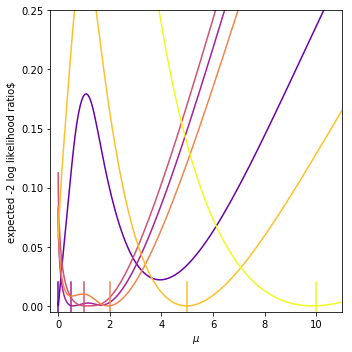

In [78]:
fig = plt.figure(figsize=(5,5))

for i, mu in enumerate(mu_test):
    plt.plot(mu_grid[mu_grid.flatten()>0.], (nllr_alices[i])[mu_grid.flatten()>0.] - np.min((nllr_alices[i])[mu_grid.flatten()>0.]), c=colors[i], ls="-")
    plt.plot([mu, mu], [-0.01, 0.02], c=colors[i], ls="-")
    # plt.plot(mu_grid, nllr_alices2[i] - np.min(nllr_alices2[i]), c="C{}".format(i), ls="-")

plt.xlabel(r"$\mu$")
plt.ylabel(r"expected -2 log likelihood ratio$")
plt.ylim(-0.005,0.25)
plt.xlim(-0.3,11.0)

plt.tight_layout()
plt.savefig("expected_likelihood_ratio_mu.pdf")

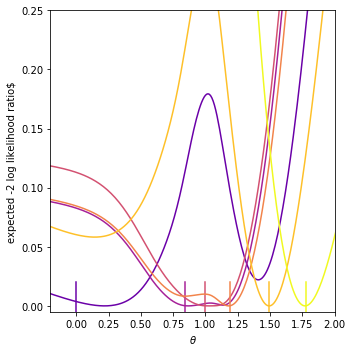

In [79]:
fig = plt.figure(figsize=(5,5))

for i, mu in enumerate(kappa_test):
    plt.plot(theta_grid, nllr_alices[i] - np.min(nllr_alices[i]), c=colors[i], ls="-")
    plt.plot([mu**0.25, mu**0.25], [-0.02, 0.02], c=colors[i], ls="-")
    # plt.plot(theta_grid, nllr_alices2[i] - np.min(nllr_alices2[i]), c="C{}".format(i), ls="-")

plt.xlabel(r"$\theta$")
plt.ylabel(r"expected -2 log likelihood ratio$")
plt.ylim(-0.005,0.25)
plt.xlim(-0.2,2.0)

plt.tight_layout()
plt.savefig("expected_likelihood_ratio_theta.pdf")